In [1]:
!pip install shap
#!pip install scipy==1.1.0

     |████████████████████████████████| 245kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.30.2-cp36-cp36m-linux_x86_64.whl size=360646 sha256=ca4108b0be1b5085a84a70bd26cff16216bbfb16fe79f51b9822d39d83333784
  Stored in directory: /root/.cache/pip/wheels/97/46/c9/b9dc708249af7eaf0951b2be62e0f6191f4de385a48e1a4cb7
Successfully built shap


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import shap
import numpy as np

In [0]:
x_train=np.load("/gdrive/My Drive/braxai/x_train.npy")
x_test=np.load("/gdrive/My Drive/braxai/x_test.npy")
y_test=np.load("/gdrive/My Drive/braxai/y_test.npy")
preds=np.load("/gdrive/My Drive/braxai/preds.npy")
preds_proba=np.load("/gdrive/My Drive/braxai/preds_proba.npy")

In [0]:
id_misclassified = np.where(y_test!=preds)[0]
x_misclassified = x_test[id_misclassified]

In [0]:
np.save("/gdrive/My Drive/braxai/id_misclassified.npy", id_misclassified)
np.save("/gdrive/My Drive/braxai/x_misclassified.npy", x_misclassified)

In [7]:
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from six.moves import cPickle
import os
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statistics as stats
import glob
#from texttable import Texttable

#import matplotlib
#matplotlib.use('Agg')

import copy
from sklearn import metrics
import seaborn
import tensorflow as tf
import keras
import keras.backend.tensorflow_backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.engine.topology import Input
from keras.optimizers import Adam
from keras import regularizers
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#from vis.visualization import visualize_activation, visualize_saliency, visualize_cam
#from vis.utils import utils
from keras import activations

from IPython.display import HTML, display
import tqdm
import json
from sklearn.metrics import roc_curve, auc, confusion_matrix
import datetime
from astropy.time import Time
from tensorflow.keras.models import model_from_json, load_model
from tensorflow.keras.utils import normalize as tf_norm

import io
import gzip
from astropy.io import fits
#from bson.json_util import loads, dumps

import matplotlib.pyplot as plt
# plt.style.use(['dark_background'])
from pandas.plotting import register_matplotlib_converters, scatter_matrix
register_matplotlib_converters()
%matplotlib inline

Using TensorFlow backend.


In [8]:
def vgg6(input_shape=(63, 63, 3), n_classes: int = 1):
    """
        VGG6
    :param input_shape:
    :param n_classes:
    :return:
    """

    model = keras.models.Sequential(name='VGG6')
    # input: 63x63 images with 3 channel -> (63, 63, 3) tensors.
    # this applies 16 convolution filters of size 3x3 each.
    model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, name='conv1'))
    model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', name='conv2'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv3'))
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv4'))
    model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(keras.layers.Dropout(0.25))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(256, activation='relu', name='fc_1'))
    model.add(keras.layers.Dropout(0.5))
    # output layer
    activation = 'sigmoid' if n_classes == 1 else 'softmax'
    model.add(keras.layers.Dense(n_classes, activation=activation, name='fc_out'))

    return model

loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'

image_shape = x_test.shape[1:]

binary_classification = True if loss == 'sparse_categorical_crossentropy' else False
n_classes = 2 if binary_classification else 1

model = vgg6(input_shape=image_shape, n_classes=n_classes)
# Swap softmax with linear
#layer_idx = utils.find_layer_idx(model, 'fc_out')
#model.layers[layer_idx].activation = activations.linear
#model = utils.apply_modifications(model)

# set up optimizer:
if optimizer == 'adam':
    optimzr = keras.optimizers.Adam(lr=3e-4, beta_1=0.9, beta_2=0.999,
                                       epsilon=None, decay=0.0, amsgrad=False)
elif optimizer == 'sgd':
    optimzr = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
else:
    print('Could not recognize optimizer, using Adam')
    optimzr = keras.optimizers.Adam(lr=3e-4, beta_1=0.9, beta_2=0.999,
                                       epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimzr, loss=loss, metrics=['accuracy'])
model.load_weights('/gdrive/My Drive/braxai/model.h5')
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Model: "VGG6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 61, 61, 16)        448       
_________________________________________________________________
conv2 (Conv2D)               (None, 59, 59, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 27, 27, 32)        4640      
_________________________________________________________________
conv4 (Conv2D)               (None, 25, 25, 32)        9248      


In [9]:
x_train.shape

(10400, 63, 63, 3)

In [10]:
x_test.shape

(1156, 63, 63, 3)

In [11]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 2500, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_misclassified)
#shap_values = e.shap_values(x_test[10:20])

# plot the feature attributions
#shap.image_plot(shap_values, -x_test[10:20])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
shap_values = np.array(shap_values)

In [13]:
shap_values.shape

(2, 45, 63, 63, 3)

In [0]:
np.save("/gdrive/My Drive/braxai/shap_values_misclassified_2.5k.npy", shap_values)

In [0]:
(l,m,n,o)=x_misclassified.shape
diff_prob=np.zeros((l,m,n))

In [0]:
for j in range(m):
    for k in range(n):
        x_misclassified=np.load("/gdrive/My Drive/braxai/x_misclassified.npy")
        for i in range(l):
            for q in range(o):
                x_misclassified[i,j,k,q] = 0.0
        y_misclassified_test = model.predict(x_misclassified)
        #y_test=np.concatenate((1-y_test, y_test), axis=1)
        for r in range(l):
            diff_prob[r,j,k] = y_misclassified_test[r,preds[id_misclassified[r]]] - preds_proba[id_misclassified[r],preds[id_misclassified[r]]]

In [0]:
np.save("/gdrive/My Drive/braxai/diff_prob_misclassified_blanking.npy", diff_prob)

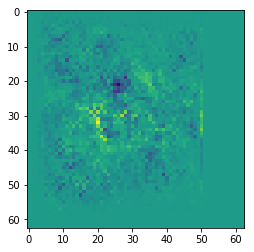

In [20]:
plt.imshow(diff_prob[0])

In [0]:
layer_idx = utils.find_layer_idx(model, 'fc_out')
penultimate_layer_idx = utils.find_layer_idx(model, 'conv4')
pd={0:'bogus',1:'real'}

In [0]:
import matplotlib.pyplot as plt

for i in range(l):
  img = x_misclassified[i]
  img_cam = visualize_cam(model, layer_idx, filter_indices=preds[id_misclassified[i]], seed_input=img, penultimate_layer_idx=penultimate_layer_idx)
  img_sal = visualize_saliency(model, layer_idx, filter_indices=preds[id_misclassified[i]], seed_input=img)

  fig = plt.figure()
  ax1 = fig.add_subplot(331)
  ax1.axis('off')
  ax1.imshow(x_misclassified[i][:, :, 0], origin='upper', cmap=plt.cm.bone)
  ax2 = fig.add_subplot(332)
  ax2.axis('off')
  ax2.imshow(x_misclassified[i][:, :, 1], origin='upper', cmap=plt.cm.bone)
  ax3 = fig.add_subplot(333)
  ax3.axis('off')
  ax3.imshow(x_misclassified[i][:, :, 2], origin='upper', cmap=plt.cm.bone)

  ax4 = fig.add_subplot(334)
  ax4.axis('off')
  ax4.imshow(img_cam)
  ax5 = fig.add_subplot(335)
  ax5.axis('off')
  ax5.imshow(img_sal)
  ax6 = fig.add_subplot(336)
  ax6.axis('off')
  ax6.imshow(diff_prob[i])

  ax7 = fig.add_subplot(337)
  ax7.axis('off')
  ax7.imshow(shap_values[preds[id_misclassified[i]]][i][:,:,0])
  ax8 = fig.add_subplot(338)
  ax8.axis('off')
  ax8.imshow(shap_values[preds[id_misclassified[i]]][i][:,:,1])
  ax9 = fig.add_subplot(339)
  ax9.axis('off')
  ax9.imshow(shap_values[preds[id_misclassified[i]]][i][:,:,2])

  plt.suptitle("Pred: "+pd[preds[id_misclassified[i]]]+"  Class:"+pd[y_test[id_misclassified[i]]])
  plt.savefig("misclassifications/"+str(id_misclassified[i])+".png")

  plt.close()

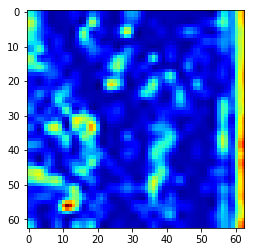

In [45]:
plt.imshow(img_cam)

In [0]:
np.where(y_test==0)

(array([   4,    5,    7,    9,   12,   16,   18,   19,   28,   30,   33,
          39,   46,   47,   49,   52,   59,   61,   64,   67,   74,   76,
          79,   86,   88,   89,  100,  101,  104,  108,  113,  114,  115,
         120,  124,  134,  141,  143,  147,  150,  151,  153,  154,  156,
         160,  162,  166,  170,  175,  176,  178,  179,  182,  188,  192,
         204,  211,  213,  215,  222,  227,  230,  231,  234,  241,  244,
         246,  250,  255,  259,  263,  274,  275,  280,  287,  292,  297,
         299,  305,  308,  310,  311,  319,  321,  326,  327,  328,  330,
         336,  342,  344,  345,  346,  348,  349,  352,  356,  358,  359,
         360,  363,  368,  370,  372,  373,  379,  384,  385,  388,  390,
         396,  397,  398,  399,  400,  402,  403,  412,  414,  420,  424,
         425,  429,  436,  441,  444,  445,  449,  454,  460,  466,  473,
         476,  481,  482,  485,  486,  488,  489,  491,  492,  493,  496,
         501,  502,  503,  511,  512, 

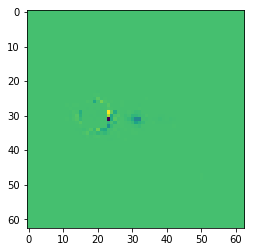

In [0]:
plt.imshow(shap_values[0][4][:,:,2])

In [0]:
shap_values[0][256][:,:,0][:,2]

array([ 0.00000000e+00,  2.32215621e-06, -2.10682302e-07, -1.30521869e-07,
        5.30760417e-06,  1.68471297e-06,  6.06524805e-03,  1.94012001e-02,
       -1.16160177e-02,  2.51420643e-02,  6.71403706e-02,  2.28154004e-01,
        3.42217796e-02,  5.20473160e-02, -1.20426901e-02, -6.26926951e-04,
        2.03171603e-05,  1.06691577e-05,  9.72977318e-07,  1.01298087e-06,
       -1.43626039e-06, -1.87968467e-08])

In [0]:
y_test[10:20]

array([1, 4, 1, 1, 1, 1, 1, 2, 5, 1], dtype=int32)

In [0]:
x_train.shape

(36504, 22, 24, 1)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

shap_values = np.load("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap_values_5k.npy")
preds = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds.npy")
prob = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds_proba.npy")

clss = {1:'EW', 2:'EA', 4:'RRab', 5:'RRc', 6:'RRd', 8:'RSCVn', 13:'LPV'}

plt.rcParams['figure.figsize'] = (18, 6)

for i in range(shap_values.shape[1]):
  plt.figure()
  fig, ax=plt.subplots(1,7)
  im0=ax[0].imshow(shap_values[0][i][:,:,0])
  ax[0].set_title("EW: "+str(prob[i,0]))
  im1=ax[1].imshow(shap_values[1][i][:,:,0])
  ax[1].set_title("EA: "+str(prob[i,1]))
  im2=ax[2].imshow(shap_values[2][i][:,:,0])
  ax[2].set_title("RRab: "+str(prob[i,2]))
  im3=ax[3].imshow(shap_values[3][i][:,:,0])
  ax[3].set_title("RRc: "+str(prob[i,3]))
  im4=ax[4].imshow(shap_values[4][i][:,:,0])
  ax[4].set_title("RRd: "+str(prob[i,4]))
  im5=ax[5].imshow(shap_values[5][i][:,:,0])
  ax[5].set_title("RSCVn: "+str(prob[i,5]))
  im6=ax[6].imshow(shap_values[6][i][:,:,0])
  ax[6].set_title("LPV: "+str(prob[i,6]))
  divider0 = make_axes_locatable(ax[0])
  cax0 = divider0.append_axes("right", size="5%", pad=0.1)
  divider1 = make_axes_locatable(ax[1])
  cax1 = divider1.append_axes("right", size="5%", pad=0.1)
  divider2 = make_axes_locatable(ax[2])
  cax2 = divider2.append_axes("right", size="5%", pad=0.1)
  divider3 = make_axes_locatable(ax[3])
  cax3 = divider3.append_axes("right", size="5%", pad=0.1)
  divider4 = make_axes_locatable(ax[4])
  cax4 = divider4.append_axes("right", size="5%", pad=0.1)      
  divider5 = make_axes_locatable(ax[5])
  cax5 = divider5.append_axes("right", size="5%", pad=0.1)
  divider6 = make_axes_locatable(ax[6])
  cax6 = divider6.append_axes("right", size="5%", pad=0.1)
  fig.colorbar(im0, cax=cax0)
  fig.colorbar(im1, cax=cax1)
  fig.colorbar(im2, cax=cax2)
  fig.colorbar(im3, cax=cax3)
  fig.colorbar(im4, cax=cax4)
  fig.colorbar(im5, cax=cax5)
  fig.colorbar(im6, cax=cax6)
  plt.suptitle("X_test: "+str(i)+" "+"Prediction: "+str(clss[preds[i]]))
  plt.savefig("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/test_plots/"+str(i)+".png")
  plt.close()

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os

shap_values = np.load("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap_values_5k.npy")
preds = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds.npy")
prob = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds_proba.npy")

os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/EW/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/EA/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RRab/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RRc/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RRd/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/RSCVn/")
os.mkdir("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/LPV/")

index = {1:0, 2:1, 4:2, 5:3, 6:4, 8:5, 13:6}
clss = {1:'EW', 2:'EA', 4:'RRab', 5:'RRc', 6:'RRd', 8:'RSCVn', 13:'LPV'}

for i in range(10):
  plt.figure()
  plt.imshow(shap_values[index[preds[i]]][i][:,:,0])
  plt.axis("off")
  plt.savefig("/gdrive/My Drive/periodic_tf/xai/SHAP_DeepExplainer/shap/"+clss[preds[i]]+"/"+str(i)+".png", bbox_inches='tight', transparent="True", pad_inches=0)
  plt.close()

In [0]:
import numpy as np
preds = np.load("/gdrive/My Drive/periodic_tf/code/experiments/cnn_22_w o_back_subtraction_float_bins/preds.npy")

In [0]:
np.where(preds==0)

(array([], dtype=int64),)